Student Performance Prediction Project
This project is about predicting how well students do in their exams using machine learning.
The dataset has information about students like their gender, parental education, lunch type, and their scores in math, reading, and writing.

I worked on two tasks:

Predict if a student passes or fails based on their average score.

Predict the exact average score of a student.

I used Logistic Regression and Random Forest models to classify pass/fail, and Random Forest for predicting scores.
At the end, I looked at which factors affect student performance the most.

Logistic Regression Accuracy: 0.86
Random Forest Accuracy: 0.855
Regression RMSE: 14.776901832099448


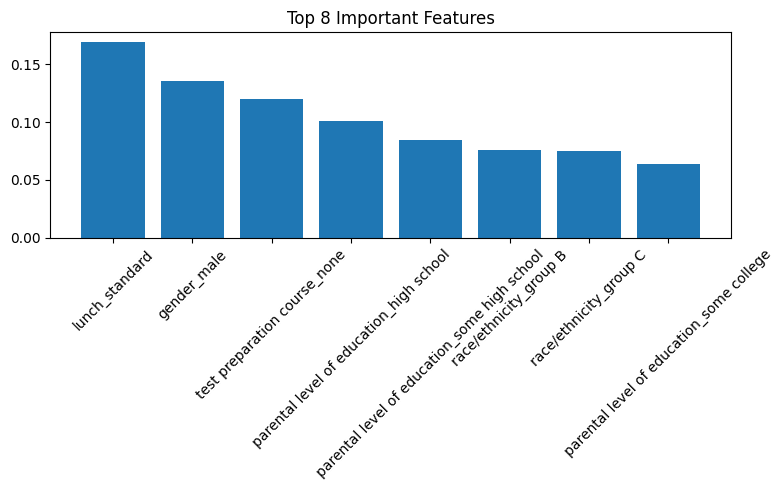

In [1]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, RandomForestRegressor
from sklearn.metrics import accuracy_score, mean_squared_error
from math import sqrt

# Load the data file
df = pd.read_csv('StudentsPerformance.csv')

# Calculate average score for each student
df['avg_score'] = df[['math score', 'reading score', 'writing score']].mean(axis=1)

# Create a new column to show if student passed or failed (pass if avg_score >= 50)
df['pass'] = (df['avg_score'] >= 50).astype(int)

# Select features for the model by removing score columns and target columns
X = df.drop(['math score', 'reading score', 'writing score', 'avg_score', 'pass'], axis=1)

# Convert categorical columns to numbers using one-hot encoding
X = pd.get_dummies(X, drop_first=True)

# Define target variables for classification and regression
y_class = df['pass']
y_reg = df['avg_score']

# Split data into training and testing sets (80% train, 20% test)
X_train, X_test, y_train_class, y_test_class = train_test_split(X, y_class, test_size=0.2, random_state=42)
_, _, y_train_reg, y_test_reg = train_test_split(X, y_reg, test_size=0.2, random_state=42)

# Train Logistic Regression model to predict pass/fail
clf = LogisticRegression(max_iter=1000)
clf.fit(X_train, y_train_class)
y_pred_class = clf.predict(X_test)
print("Logistic Regression Accuracy:", accuracy_score(y_test_class, y_pred_class))

# Train Random Forest model for classification
rf_clf = RandomForestClassifier(n_estimators=100, random_state=42)
rf_clf.fit(X_train, y_train_class)
y_pred_rf = rf_clf.predict(X_test)
print("Random Forest Accuracy:", accuracy_score(y_test_class, y_pred_rf))

# Train Random Forest model for predicting average score
reg = RandomForestRegressor(n_estimators=100, random_state=42)
reg.fit(X_train, y_train_reg)
y_pred_reg = reg.predict(X_test)
mse = mean_squared_error(y_test_reg, y_pred_reg)
rmse = sqrt(mse)
print("Regression RMSE:", rmse)

# Show which features are most important for predicting pass/fail
importances = rf_clf.feature_importances_
features = X.columns
indices = np.argsort(importances)[::-1]

plt.figure(figsize=(8,5))
plt.title("Top 8 Important Features")
plt.bar(range(8), importances[indices][:8], align='center')
plt.xticks(range(8), features[indices][:8], rotation=45)
plt.tight_layout()
plt.show()


Conclusion
Logistic Regression and Random Forest models gave around 86% accuracy in predicting whether a student passes or fails.

Random Forest regression predicted average scores with an error of about 14.78 points.

From the results, things like parents' education, test preparation, and lunch type seem to have a big impact on students’ results.

This project helped me learn how to clean data, train machine learning models, and understand what affects student performance.*italicized text*